Importing needed libraries.
-------------

In [67]:
import pandas as pd 
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

-----------------
Import Data from csv file.
----------------

In [12]:
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head() 

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


--------------------------
Check wheather any null values present or not
------------------

In [13]:
data[data.isnull().any(axis=1)].head()

,TV,Radio,Newspaper,Sales


-------------------------
Visualise the data using seaborn
-----------------

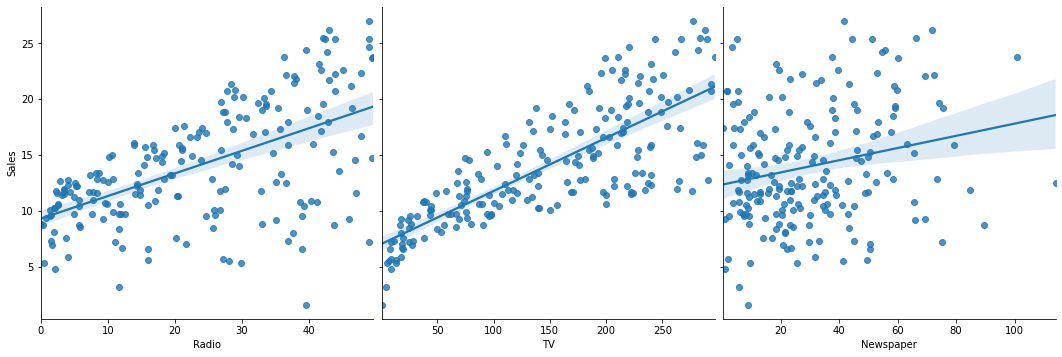

In [68]:
%matplotlib inline 
sns.pairplot(data, x_vars = ['Radio', 'TV','Newspaper'], y_vars = 'Sales', height = 5, aspect = 1, 
             kind = 'reg',diag_kind = None)
plt.show(sns)

----------------------
Split X and Y
------------

In [15]:
x = data.loc[:,['TV', 'Radio', 'Newspaper']]
y = data.loc[:,['Sales']]
print("Dimenstion of X : {}".format(x.shape))
print("Dimenstion of Y : {}".format(y.shape))
x.head()

Dimenstion of X : (200, 3)
Dimenstion of Y : (200, 1)


,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


--------------
Lets split data into train and test set
--------------

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1 )
print("Shape of X_train : {}".format(X_train.shape))
print("Shape of X_test : {}".format(X_test.shape))
print("Shape of Y_train : {}".format(Y_train.shape))
print("Shape of Y_test : {}".format(Y_test.shape))

Shape of X_train : (160, 3)
Shape of X_test : (40, 3)
Shape of Y_train : (160,)
Shape of Y_test : (40,)


-------------------
Linear Regression from SciKit Learn
-----------

In [51]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
print(linreg.intercept_)
print(linreg.coef_)

[2.90794702]
[[0.0468431  0.17854434 0.00258619]]


-------------------------
Predict using created linearRegression model
----------------

In [62]:
Y_predicted = linreg.predict(X_test)

----------------------------------
Let's computing the RMSE for Sales predictions
-------------

In [61]:
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

1.4113417558581578


-------------------------
Lets remove 'newspaper' and check the RMSE
---------------

In [63]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("RMSE after removal of 'Newspaper' : {} ".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE after removal of 'Newspaper' : 1.3879034699382888 


-------------------
Lets remove 'TV' and check the RMSE
----------------

In [64]:
feature_cols = ['Newspaper', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("RMSE after removal of 'TV' : {} ".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE after removal of 'TV' : 3.748697497467727 


-------------------
Lets remove 'Radio' and check the RMSE
--------------

In [65]:
feature_cols = ['Newspaper', 'TV']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("RMSE after removal of 'TV' : {} ".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE after removal of 'TV' : 3.352056334433862 


-------------------------
Therefore, In this case we can conclude that Sales is mainly depend on advertisment in TV & Radio. Not in Newspaper.
-----------------------------